In [7]:
import mxnet as mx
from mxnet import gluon, autograd
from mxnet import ndarray as nd
from mxnet.gluon.model_zoo import vision as models
import numpy as np
from PIL import Image
import os

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import json
imagenet_classes = json.load(open('imagenet_classes.json'))
idx2class = [imagenet_classes[str(i)].split(',')[0] for i in range(1000)]
class2idx = {v:i for i,v in enumerate(idx2class)}

In [4]:
vgg16 = models.vgg16(pretrained=True)

Model file is not found. Downloading.


In [5]:
print(vgg16)

VGG(
  (features): HybridSequential(
    (0): Conv2D(64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Activation(relu)
    (2): Conv2D(64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Activation(relu)
    (4): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False)
    (5): Conv2D(128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): Activation(relu)
    (7): Conv2D(128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): Activation(relu)
    (9): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False)
    (10): Conv2D(256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): Activation(relu)
    (12): Conv2D(256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): Activation(relu)
    (14): Conv2D(256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): Activation(relu)
    (16): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False)
    (17): Conv2D(512, kernel_siz

In [43]:
data = nd.array(np.asarray(Image.open('bird.jpg')))
data = mx.image.imresize(data, 256, 256)
data, _ = mx.image.center_crop(data, (224, 224))
data = nd.transpose(data, (2, 0, 1))
data = data.astype(np.float32)/127.5 - 1
data = data.reshape((1,)+data.shape)
print(data.shape)

(1, 3, 224, 224)


In [29]:
data.attach_grad()
with autograd.record():
    out = vgg16(data)
out.backward()

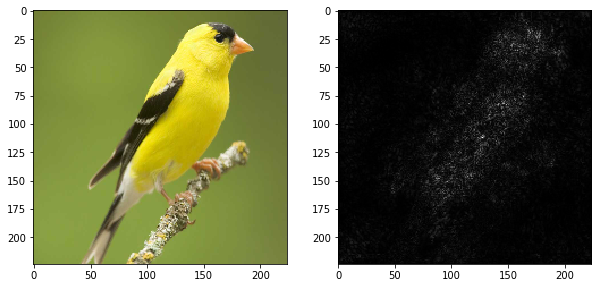

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(((data[0].asnumpy().transpose(1,2,0)+1)*127.5).astype(np.uint8))
plt.subplot(1,2,2)
plt.imshow(np.abs(data.grad.asnumpy()[0]).max(axis=0), cmap='gray')